✅ Loaded filtered data: 2392 rows
📁 Saved 1238 rows → StudyCategory_0.csv
📁 Saved 1154 rows → StudyCategory_1.csv
📁 Saved 1272 rows → AttendanceCategory_0.csv
📁 Saved 1120 rows → AttendanceCategory_1.csv
📁 Saved 1671 rows → Tutoring_0.csv
📁 Saved 721 rows → Tutoring_1.csv
📁 Saved 212 rows → ParentalSupport_0.csv
📁 Saved 489 rows → ParentalSupport_1.csv
📁 Saved 740 rows → ParentalSupport_2.csv
📁 Saved 697 rows → ParentalSupport_3.csv
📁 Saved 254 rows → ParentalSupport_4.csv
📁 Saved 1475 rows → Extracurricular_0.csv
📁 Saved 917 rows → Extracurricular_1.csv
📁 Saved 1666 rows → Sports_0.csv
📁 Saved 726 rows → Sports_1.csv
📁 Saved 1921 rows → Music_0.csv
📁 Saved 471 rows → Music_1.csv
📁 Saved 2016 rows → Volunteering_0.csv
📁 Saved 376 rows → Volunteering_1.csv

📊 Summary saved to 'data/filter_summary.csv'

Filter Summary Sample:
              Feature  Value  Rows                  Filename
0       StudyCategory      0  1238       StudyCategory_0.csv
1       StudyCategory      1  1154       S

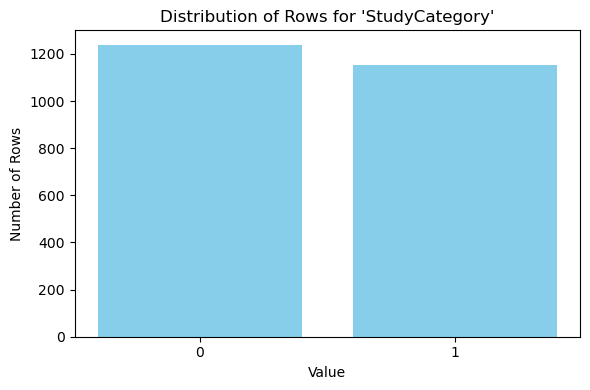

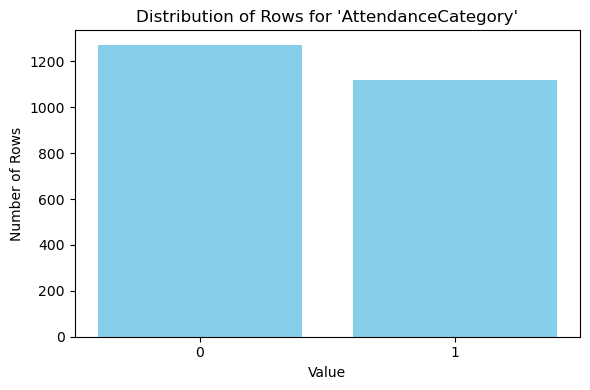

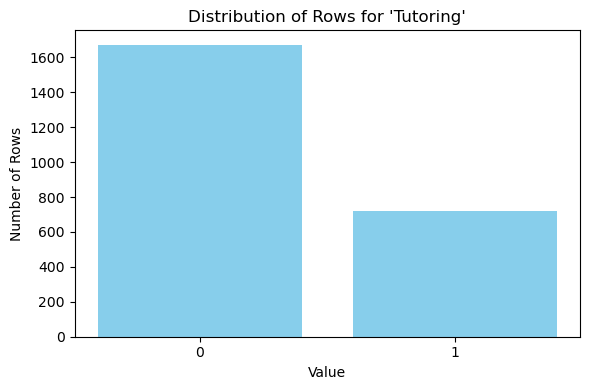

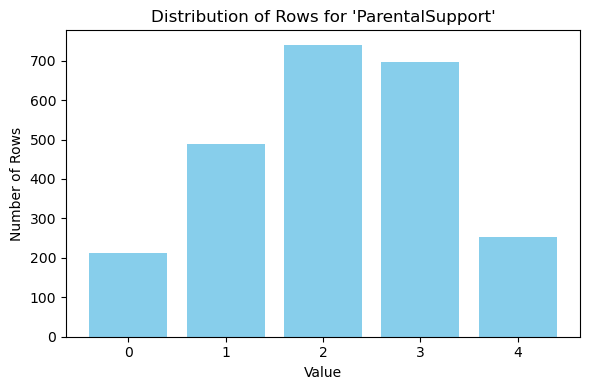

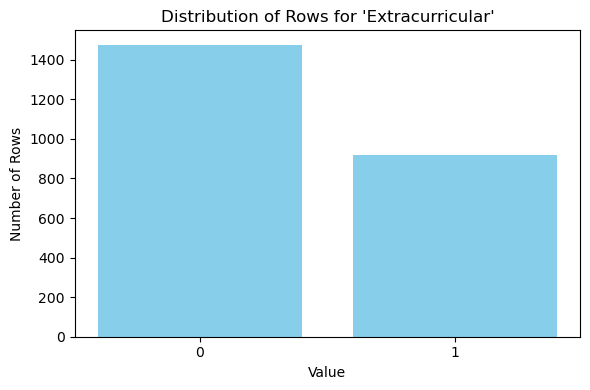

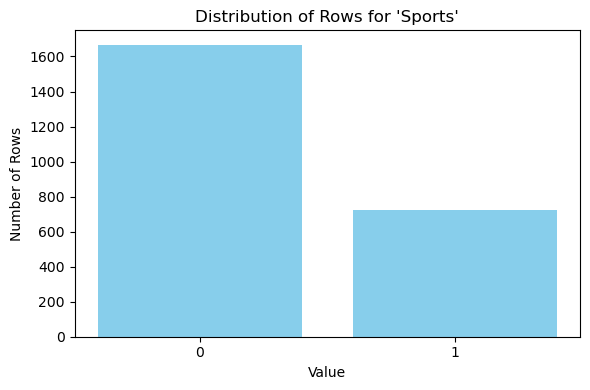

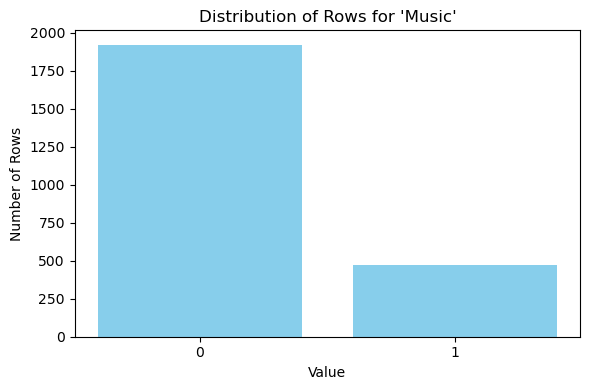

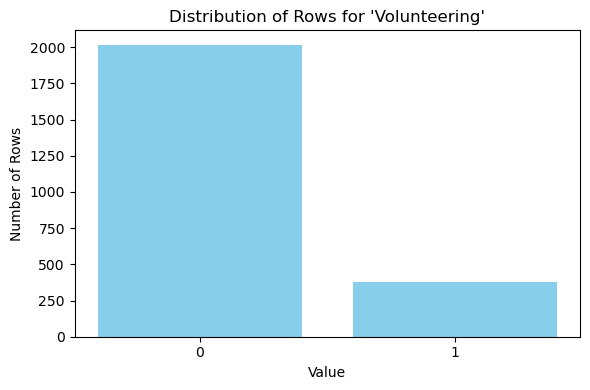

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === STEP 1: Load your dataset ===
filtered_file = "Student_performance_data .csv"  # Adjust path if needed
try:
    data = pd.read_csv(filtered_file)
except FileNotFoundError:
    raise FileNotFoundError(f"File '{filtered_file}' not found. Make sure it's in the same folder as this script.")

print(f"✅ Loaded filtered data: {len(data)} rows")

# === STEP 2: Create binary categories for Study and Attendance ===
data["StudyCategory"] = data["StudyTimeWeekly"].apply(lambda x: 0 if x <= 10 else 1)
data["AttendanceCategory"] = data["Absences"].apply(lambda x: 0 if x <= 15 else 1)

# === STEP 3: Features to filter ===
target_features = [
    "StudyCategory", "AttendanceCategory", "Tutoring", "ParentalSupport",
    "Extracurricular", "Sports", "Music", "Volunteering"
]

# === STEP 4: Prepare output folder ===
output_folder = "Data_Filtered_by_value"
os.makedirs(output_folder, exist_ok=True)

# === STEP 5: Filter and save subsets ===
summary_records = []

for feature in target_features:
    if feature not in data.columns:
        print(f"⚠️ Skipping '{feature}' (not found)")
        continue

    for val in sorted(data[feature].dropna().unique()):
        subset = data[data[feature] == val].copy()
        if subset.empty:
            continue

        # Match exact export format
        formatted = subset[
            ["StudentID", "Age", "Gender", "Ethnicity", "ParentalEducation",
             "StudyTimeWeekly", "Absences", "Tutoring", "ParentalSupport",
             "Extracurricular", "Sports", "Music", "Volunteering",
             "GPA", "GradeClass"]
        ]

        filename = f"{feature}_{val}.csv".replace(" ", "_")
        filepath = os.path.join(output_folder, filename)
        formatted.to_csv(filepath, index=False)

        summary_records.append({
            "Feature": feature,
            "Value": val,
            "Rows": len(formatted),
            "Filename": filename
        })

        print(f"📁 Saved {len(formatted)} rows → {filename}")

# === STEP 6: Create and save summary ===
summary_df = pd.DataFrame(summary_records)
os.makedirs("data", exist_ok=True)
summary_df.to_csv("data/filter_summary.csv", index=False)
print("\n📊 Summary saved to 'data/filter_summary.csv'")

# === STEP 7: Show sample of summary and charts ===
print("\nFilter Summary Sample:")
print(summary_df.head(10))

for feature in summary_df["Feature"].unique():
    feature_df = summary_df[summary_df["Feature"] == feature]
    plt.figure(figsize=(6, 4))
    plt.bar(feature_df["Value"].astype(str), feature_df["Rows"], color="skyblue")
    plt.title(f"Distribution of Rows for '{feature}'")
    plt.xlabel("Value")
    plt.ylabel("Number of Rows")
    plt.tight_layout()
    plt.show()
